In [17]:
# -------------------------------------------------
#  Step 1: Business Understanding
# -------------------------------------------------
"""
Objective:
Predict worldwide box office revenue for movies using machine learning.
We aim to identify key factors influencing a movie's financial success.
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# -------------------------------------------------
#  Step 2: Data Understanding
# -------------------------------------------------
def load_data(file_path):
    """
    Load the dataset from the given file path and display basic information.

    Args:
        file_path (str): Path to the CSV dataset.

    Returns:
        pd.DataFrame: Loaded dataset.
    """
    df = pd.read_csv(file_path)
    
    print("🔹 Data Overview:")
    print(df.info())
    print(df.describe())

    # Check for missing values
    missing_values = df.isnull().sum()
    print("🔹 Missing Values:\n", missing_values)

    # Explanation of Missing Value Handling
    if missing_values.sum() == 0:
        print(" No missing values detected. No imputation needed.")
    else:
        print(" Missing values found. Consider appropriate handling methods (e.g., mean imputation, dropping).")

    return df

# Load Data
file_path = "movie_statistic_dataset.csv"
movie_df = load_data(file_path)

🔹 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+

In [22]:
# -------------------------------------------------
#  Step 3: Data Preparation (Feature Engineering & Cleaning)
# -------------------------------------------------
def preprocess_data(df):
    """
    Cleans and preprocesses the dataset:
    - Applies log transformation to skewed numerical columns.
    - Removes extreme outliers in revenue.
    - Selects relevant features.

    Args:
        df (pd.DataFrame): The input dataset.

    Returns:
        pd.DataFrame, pd.Series: Processed features (X) and target variable (y).
    """
    df["log_budget"] = np.log1p(df["Production budget $"])
    df["log_revenue"] = np.log1p(df["Worldwide gross $"])
    df["log_votes"] = np.log1p(df["movie_numerOfVotes"])

    # Remove extreme outliers
    df = df[df["Worldwide gross $"] < 1_000_000_000]

    # Define features and target variable
    X = df[["log_budget", "runtime_minutes", "movie_averageRating", "approval_Index", "log_votes"]]
    y = df["log_revenue"]

    return X, y

# Preprocess Data
X, y = preprocess_data(movie_df)

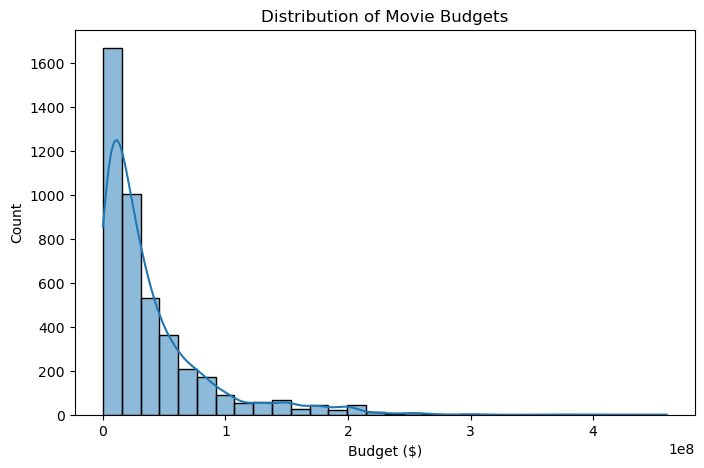

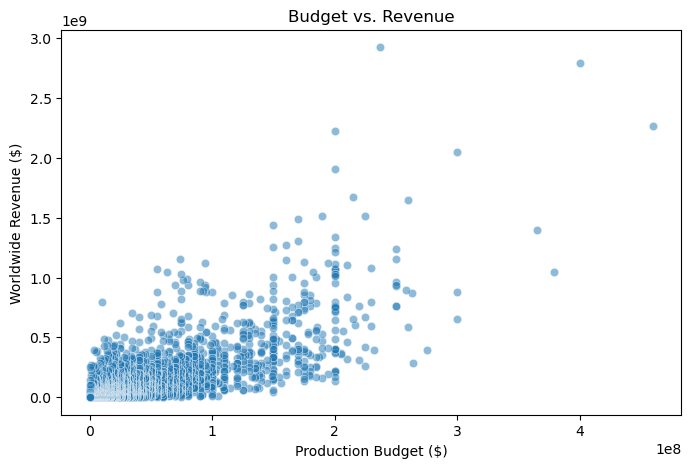

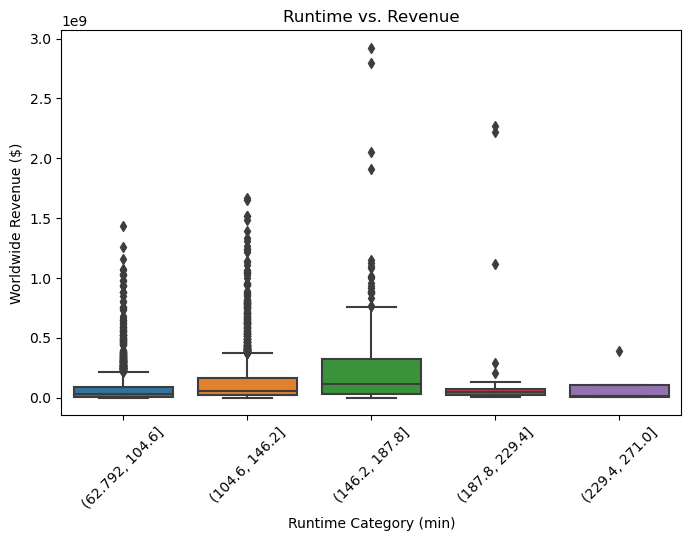

In [23]:
# -------------------------------------------------
#  Step 4: Data Exploration & Business Questions
# -------------------------------------------------

# Business Question 1: What is the distribution of movie budgets?
plt.figure(figsize=(8, 5))
sns.histplot(movie_df["Production budget $"], bins=30, kde=True)
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget ($)")
plt.show()

# Business Question 2: How does revenue correlate with budget?
plt.figure(figsize=(8, 5))
sns.scatterplot(x=movie_df["Production budget $"], y=movie_df["Worldwide gross $"], alpha=0.5)
plt.title("Budget vs. Revenue")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Revenue ($)")
plt.show()

# Business Question 3: Do longer movies earn more revenue?
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(movie_df["runtime_minutes"], bins=5), y=movie_df["Worldwide gross $"])
plt.title("Runtime vs. Revenue")
plt.xlabel("Runtime Category (min)")
plt.ylabel("Worldwide Revenue ($)")
plt.xticks(rotation=45)
plt.show()

In [25]:
# -------------------------------------------------
#  Step 5: Data Modeling
# -------------------------------------------------
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and testing sets.

    Args:
        X (pd.DataFrame): Feature variables.
        y (pd.Series): Target variable.
        test_size (float): Proportion of dataset for testing.
        random_state (int): Random seed for reproducibility.

    Returns:
        tuple: Training and testing sets (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Split Data
X_train, X_test, y_train, y_test = split_data(X, y)

In [26]:
# -------------------------------------------------
#  Step 6: Train and Evaluate Models
# -------------------------------------------------
def train_model(model, X_train, y_train, X_test, y_test):
    """
    Trains a given model and evaluates it on test data.

    Args:
        model: A scikit-learn regression model.
        X_train (pd.DataFrame): Training feature set.
        y_train (pd.Series): Training target variable.
        X_test (pd.DataFrame): Testing feature set.
        y_test (pd.Series): Testing target variable.

    Returns:
        dict: Evaluation metrics including MAE, MSE, and R² Score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
    }

    return metrics

# Train Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_results = train_model(lr_model, X_train, y_train, X_test, y_test)
rf_results = train_model(rf_model, X_train, y_train, X_test, y_test)

# Display Model Results
print(" Linear Regression Results:", lr_results)
print(" Random Forest Results:", rf_results)

 Linear Regression Results: {'MAE': 0.8083217570177682, 'MSE': 1.3421458768885317, 'R² Score': 0.6759484966992991}
 Random Forest Results: {'MAE': 0.7640983443194381, 'MSE': 1.1696058938234744, 'R² Score': 0.7176070390787077}


In [27]:
# -------------------------------------------------
#  Step 7: Hyperparameter Tuning
# -------------------------------------------------
def tune_hyperparameters(X_train, y_train):
    """
    Performs hyperparameter tuning on a Random Forest model using GridSearchCV.

    Args:
        X_train (pd.DataFrame): Training feature set.
        y_train (pd.Series): Training target variable.

    Returns:
        RandomForestRegressor: Best tuned Random Forest model.
    """
    param_grid = {"n_estimators": [100, 200], "max_depth": [10, 20, None]}
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_

# Tune Hyperparameters
best_rf_model = tune_hyperparameters(X_train, y_train)

In [28]:
# -------------------------------------------------
#  Step 8: Prediction Example
# -------------------------------------------------
def predict_revenue(model, budget, runtime, rating, approval, votes):
    """
    Predicts a movie's worldwide revenue based on given features.

    Returns:
        float: Predicted worldwide revenue.
    """
    movie_data = [[np.log1p(budget), runtime, rating, approval, np.log1p(votes)]]
    predicted_revenue = np.expm1(model.predict(movie_data)[0])
    return predicted_revenue

predicted_revenue = predict_revenue(best_rf_model, 200_000_000, 130, 7.5, 6.8, 500_000)
print(f" Predicted Worldwide Revenue: ${predicted_revenue:,.2f}")

 Predicted Worldwide Revenue: $565,898,632.08


C:\Users\dduun\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
